In [1]:
import os, sys
from pathlib import Path
PARENT_DIR = Path(os.getcwd()).resolve().parent
sys.path += [str(PARENT_DIR.joinpath('SciPyFST'))]
from SciPyFST import SciPyFST as FST
import graphviz
from IPython.display import display, Markdown

Create Moore FST

In [2]:
states = [0,1,2,3]
initState = 0
inAlphabet = [0,1,2,3,4]
outAlphabet = [0,1,2]
# transitionFunction [ [State, inAlphabet, nextState], ...]
transitionFunction = [ [0,0,1], [1,0,1], [1,1,2], [1,2,0], [2,2,0], [3,2,0], [2,0,3] ]
# outputFunction Moore [ [State, outAlphabet], ...]
outputFunctionMoore = [ [0,0], [1,1], [2,2], [3,0]]
fstMoore = FST(states, initState, inAlphabet, outAlphabet, transitionFunction, outputFunctionMoore)

Visualise FST

| Input \ State | q0 / 0 | q1 / 1 | q2 / 2 | q3 / 0 |
|:---:|:---:|:---:|:---:|:---:|
| 0 | q1 | q1 | q3 | ... |
| 1 | ... | q2 | ... | ... |
| 2 | ... | q0 | q0 | q0 |
| 3 | ... | ... | ... | ... |
| 4 | ... | ... | ... | ... |


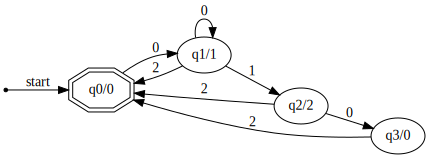

In [3]:
display(Markdown(fstMoore.toMdTable()))
graphviz.Source(fstMoore.toDot())

Play FST

In [4]:
inSignals = [1,0,0,1,0,0,2,0,2,0,1,3,4,0]
outSignals, outStates = fstMoore.playFST(inSignals)
print(" inSignals - " + str(inSignals))
print("    States - " + str(outStates))
print("outSignals - " + str(outSignals))

 inSignals - [1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 3, 4, 0]
    States - [0, 0, 1, 1, 2, 3, 3, 0, 1, 0, 1, 2, 2, 2, 3]
outSignals - [0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 2]
